In [1]:
import sys, pathlib

import numpy as np
import matplotlib.pyplot as plt

## Naive Implementation of Discrete N-Body Simulation
Given $N$ point particles with a given mass in space we would like to simulate their trajetories due to gravitational interaction with each other. Using Newton's law of gravity we find that the gravitational force due to particle $i$ on a different particle $j$ is 
$$
F_{i,j} = G \frac{m_j m_i}{|x_i - x_j|^3} (x_i - x_j),
$$
where $G$ is the gravitational constant and $x_k$ is the position vector of particle $k$. Applying the super position principle gives the total force on particle $j$
$$
F_j = \sum_{\substack{i=1 \\ i\neq j}}^N F_{i,j}
$$
We can also express force as $F_j = m_j a_j,$ where $m_j$ is the mass and $a_j$ the acceleration of $j$. Since $a_j = dv_j/dt$ we can produce a system of first order differential equations
$$
F_j = m_j \frac{dv_j}{dt} \quad \text{and}\quad v_j = \frac{dx_j}{dt}.
$$
Since I don't know how to find a solution that will satisfy all of these $6N$ equations for aritrary initial conditions, we simplify by discretizing time. Multiplying by infinitesimally small $dt$ then changing $dt$ to a finite $\Delta t$ will change our equations from
$$
F_j dt= m_j dv_j \quad \text{and}\quad v_j dt= dx_j \quad \rightarrow \quad F_j \Delta t= m_j \Delta v_j \quad \text{and}\quad v_j \Delta t= \Delta x_j.
$$
The new equations are the best linear approximation to our original equations.

Let the initial position and velocity of $j$ be $x^{(0)}_j$ and $v^{(0)}_j.$ Let $x^{(k)}_j$ describe the position of $j$ at time $k\Delta t.$ Given the state of the system at step $k,$ i.e. we know $x^{(k)}_j$ and $v^{(k)}_j$ for all $j,$ we can compute the state at time $k+1$ by computing 
$$
F^{(k)}_j = \sum_{\substack{i=1 \\ i\neq j}}^N G \frac{m_j m_i}{\left|x^{(k)}_i - x^{(k)}_j\right|^3} \left(x^{(k)}_i - x^{(k)}_j\right) \\
v^{(k+1)}_j = v^{(k)}_j + \Delta t \frac{F^{(k)}_j}{m_j} \\
x^{(k+1)}_j = x^{(k)}_j + \Delta t v^{(k)}_j.
$$

In [2]:
data_folder = pathlib.Path().resolve().parent / "output"

In [3]:
with open(data_folder / "settings_out", 'r') as f:
    particle_count, time_delta, time_steps = f.readlines()[1].split(' ')
    
particle_count = int(particle_count)
time_delta = float(time_delta)
time_steps = int(time_steps)

settings = np.loadtxt(data_folder / "pos_out").reshape(time_steps, particle_count, 3)
pos = np.loadtxt(data_folder / "pos_out").reshape(time_steps, particle_count, 3)
vel = np.loadtxt(data_folder / "vel_out").reshape(time_steps, particle_count, 3)

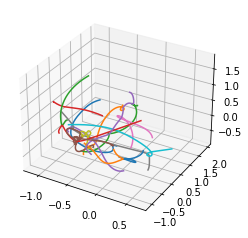

In [4]:
ax = plt.figure().add_subplot(projection='3d')

for k in range(particle_count):
    ax.plot(pos[:, k, 0], pos[:, k, 1], pos[:, k, 2])

plt.show()